## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

## Setup

In [3]:
seed = 100

In [4]:
headers = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
df_full = pd.read_csv('../data/raw/newsCorpora.csv', sep='\t', header=None, names=headers)

In [5]:
df_full.shape

(422419, 8)

In [6]:
df = df_full.sample(10000)

In [7]:
df.sample(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
266034,266480,Study Says: Cynicism Affects Health And Poses ...,http://yottafire.com/2014/05/study-says-cynici...,YottaFire,m,dWzfVzADvlPoabMm0XRnHEg1fzuhM,yottafire.com,1401372175492
214976,215422,The First Picture From the Set of 'Star Wars: ...,http://mashable.com/2014/05/16/star-wars-episo...,Mashable,e,dXQx0Hai6zlpPcMHtYTA3Q1w826rM,mashable.com,1400396269646
284199,284659,"Channing Tatum & Jonah Hill, Snoop Dogg, and E...",http://www.thehothits.com/news/46721/channing-...,The Hot Hits,e,d4RgurdSE0ejKWMjfcqlTKHObqs3M,www.thehothits.com,1402753402023


## EDA

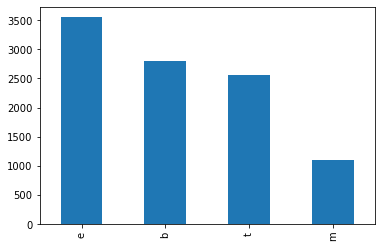

In [8]:
df['CATEGORY'].value_counts().plot(kind='bar')

Categories are reasonably well-balanced, so balancing techniques are skipped.

## Model

In [9]:
pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ('clf', SGDClassifier(random_state=100))
])

param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__loss': ['log', 'hinge', 'modified_huber'],
    'clf__penalty': ['l1','l2','elasticnet'], 
    'clf__alpha': [1e-3, 1e-2, 1e-1, 1e0],
    'clf__shuffle': [True],
    'clf__max_iter': [500, 1000, 2000],
}

In [10]:
X = df["TITLE"]
y = df["CATEGORY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [11]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        SGDClassifier(random_state=100))]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.001, 0.01, 0.1, 1.0],
                         'clf__loss': ['log', 'hinge', 'modified_huber'],
                         'clf__max_iter': [500, 1000, 2000],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__shuffle': [True],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [12]:
print(f"Best score: {search.best_score_}")
print(f"Best params: {search.best_params_}")

Best score: 0.8539999999999999
Best params: {'clf__alpha': 0.001, 'clf__loss': 'modified_huber', 'clf__max_iter': 500, 'clf__penalty': 'l2', 'clf__shuffle': True, 'tfidf__ngram_range': (1, 1)}


In [13]:
y_pred = search.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred)}")

Accuracy on test set: 0.8536


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           b       0.84      0.85      0.84       707
           e       0.85      0.95      0.90       898
           m       0.93      0.70      0.80       249
           t       0.86      0.78      0.82       646

    accuracy                           0.85      2500
   macro avg       0.87      0.82      0.84      2500
weighted avg       0.86      0.85      0.85      2500



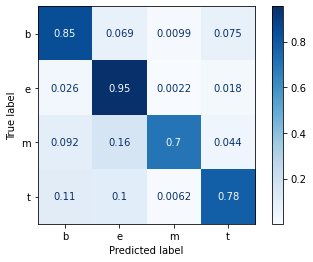

In [15]:
plot_confusion_matrix(search, X_test, y_test,
                                 display_labels=y.unique(),
                                 cmap=plt.cm.Blues,
                                 normalize='true');

In [18]:
search.predict_proba(["test1", "test2"])

array([[0.30319525, 0.3583056 , 0.12942516, 0.20907399],
       [0.30319525, 0.3583056 , 0.12942516, 0.20907399]])